In [1]:
#importing libraries 

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import string

import wordcloud

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')


from sklearn.feature_extraction.text import TfidfVectorizer  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
data.value_counts

<bound method DataFrame.value_counts of                                                     text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]>

In [4]:
data['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [5]:
#remove html tags

for i in range(data.shape[0]):
    data['text'][i] = BeautifulSoup(data['text'][i], "lxml").text

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12804\2811682952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][i] = BeautifulSoup(data['text'][i], "lxml").text
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [6]:
#remove punctuations
def punctuation(sentence):
    text = [letters.lower() for letters in sentence if letters not in string.punctuation ]
    text = ''.join(text)
    return text

data['text'] = data['text'].apply(punctuation)

In [7]:
#removing stopwords
def stopwords(sentence):
    text = [words for words in sentence.split() if words not in nltk.corpus.stopwords.words('english')]
    text = ' '.join(text)
    return text

data['text'] = data['text'].apply(stopwords)

In [8]:
#stemming
from nltk import PorterStemmer  
data['text'] = data['text'].apply(PorterStemmer().stem)
data.head()

,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1


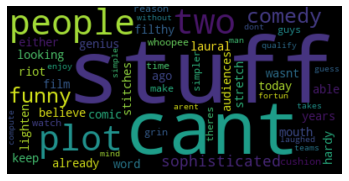

In [27]:
from wordcloud import WordCloud
text = data.text[10]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
#tf-Idf vectorizer
x = TfidfVectorizer().fit_transform(data['text']) 
y =  data['label']

In [12]:
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
#making predictions
y_pred = classifier.predict(x_test)
#model accuracy
print("Model Accuracy : {}%".format((y_pred == y_test).mean()))
#confusion matrix 
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test,y_pred))

Model Accuracy : 0.8475%
[[4296  749]
 [ 776 4179]]
